In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from __future__ import (absolute_import, division,
#                         print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
# plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 190
pd.options.display.max_rows = 55

In [142]:
df = pd.read_csv('uaz_clust_rich')

In [143]:
df.head()

,afficheW,owner,country,latitude,longitude,profile_date,c_gt_Cycling,c_gt_Auto_B_Compact_Crossover,c_gt_Sports_equipments_and_Outdoor_gear,c_gt_ISP_and_Browsers,c_gt_Fragrance,c_gt_Films,c_gt_Transition_Fuel,c_gt_Tradesman,c_gt_Comedy,c_gt_Auto_Brand_B,c_gt_Auto_Brand_C,c_gt_Auto_Brand_A,c_gt_South_American_Travel,c_gt_Alps_3_Valleys,c_gt_Diet_and_nutrition,c_gt_Holidays,c_gt_Beauty_products,c_gt_Computer_Science,c_gt_News,c_gt_History,c_gt_Tourism,c_gt_Air_Transport,c_gt_Furniture,c_gt_Amusement_park,c_gt_Hair_products_and_styling,c_gt_Back_to_school,c_gt_Golf,c_gt_Fantasy,c_gt_Supermarkets,c_gt_Auto_Off_road,c_gt_Higher_education,c_gt_Architect,c_gt_Holiday_rentals,c_gt_DIY_Equipment,c_gt_X,c_gt_Fauna,c_gt_Swimming,c_gt_Ecology,c_gt_Art,c_gt_Good_deals,c_gt_Loans,c_gt_Laptop,c_gt_Utility_vehicles,c_gt_Accessories,c_gt_Computer_hardware_and_devices,c_gt_Desserts,c_gt_Health,c_gt_Auto_Multi_Purpose_Vehicles,c_gt_Churn_Telecom,c_gt_Professional_insurance,c_gt_Jewelry,c_gt_Alzheimer_Aid,c_gt_Retirement_period,c_gt_Auto_F_Sport_and_luxury_cars,c_gt_Cameras,c_gt_Arts_and_crafts,c_gt_Eyewear,c_gt_Sports,c_gt_Weapons,c_gt_Relaxation_therapy,c_gt_Auto_C_Compact_cars,c_gt_Social_networks,c_gt_Gambling,c_gt_Teaching,c_gt_High_Fashion,c_gt_Winter_Holidays,c_gt_Local_car_brands,c_gt_Car_buyers,c_gt_Theatre,c_gt_Entrepreneur,c_gt_Insurance_churning,c_gt_Motor_Sport,c_gt_Auto_parts,c_gt_Event_Planning,c_gt_Going_out,c_gt_Popular_Events,c_gt_Bicycle,c_gt_Astronomy,c_gt_Cooking,c_gt_Air_conditioning,c_gt_Occult,c_gt_Company_Buyout,c_gt_Video_games,c_gt_Careers_and_occupational_training,c_gt_Comics,c_gt_Geothermic_Eolic_and_Biomasses,c_gt_Health_and_Care_Products,c_gt_Car_Rental,c_gt_Rail_Transport,...,c_gt_Merchant,c_gt_Cosmetic_surgery,c_gt_Laundry,c_gt_custom_cluster_3,c_gt_Insurance,c_gt_Fast_Food_Brand_A,c_gt_Infants_and_children,c_gt_Anatomy,c_gt_Running,c_gt_Games_consoles,c_gt_Energy_Savings,c_gt_Sunny_Destination,c_gt_Philosophy,c_gt_Internet_of_Things,c_gt_Cinemas,c_gt_Champions_League,c_gt_Asset_management,c_gt_Reality_Television,c_gt_Fine_dining_and_local_produce,c_gt_Rugby,c_gt_Kitchen_Appliances,c_gt_Top_French_Engineering_schools,c_gt_Cloud_computing,c_gt_Horse_racing,c_gt_Heritage_transmission,c_gt_Meat_and_Fish,c_gt_Auto_E_Minivan,c_gt_Travel_in_France,c_gt_ALevels,c_gt_Advertising,c_gt_Auto_A_Urban_cars,c_gt_Literature,c_gt_Hiking_and_Mountaineering,c_gt_Tapeo,c_gt_Stop_smoking,c_gt_Gas_and_electricity,c_gt_Pets,c_gt_Outdoor_activities,c_gt_Snacks,c_gt_Warez,c_gt_Veg_and_Vegan,c_gt_Major_Appliances_White_goods,c_gt_Weather,c_gt_Personal_care,c_gt_Vegetarian_and_Environmentally_friendly,c_gt_Politics,c_gt_Clothing,c_gt_Tablet,c_gt_Astrology,c_gt_Business_Travel,c_gt_Auto_Brand_D,c_gt_Auto_Brand_E,c_gt_Auto_Brand_F,c_gt_Auto_Brand_G,c_gt_Auto_Brand_H,c_gt_Auto_Brand_I,c_gt_Auto_Brand_J,c_gt_Auto_Brand_K,c_gt_Auto_Brand_L,c_gt_Auto_Brand_M,c_gt_Auto_Brand_N,c_gt_Auto_Brand_O,s_a_11_14,s_a_15_17,s_a_18_24,s_a_25_34,s_a_35_49,s_a_50_64,s_a_65_110,s_g_m,s_g_f,s_s_i,s_u_pdt,s_u_plh,s_u_pwe,s_u_pnw,s_u_hp,s_u_hpt,s_u_hnt,s_u_hat,s_i_0,s_i_1,s_i_2,s_i_3,s_i_4,s_c_w,s_c_wo,s_f_c,s_f_f,s_f_sp,s_f_s,s_e_po,s_e_pr,s_e_s,s_e_u
0,---LykbY8gX-,wb,RU,54.9063,99.0254,20181122,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,10.0,2.0,NaN,3.0,NaN,NaN,6.0,NaN,NaN,16.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,1.0,NaN,NaN,15.0,NaN,6.0,NaN,13.0,NaN,4.0,NaN,4.0,11.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,9.0,NaN,2.0,15.0,16.0,NaN,7.0,14.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,13.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,17.0,NaN,NaN,NaN,NaN,1.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,6.0,NaN,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,15.0,18.0,18.0,19.0,2.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,8.0,8.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,17.0,4.0,8.0
1,--4Ararcb97-,wb

In [144]:
df_geo = df.copy()
#df_geo.to_csv("df_geo.csv")

In [113]:
df.drop(["afficheW", "owner", "country","latitude", "longitude", "profile_date"],  axis=1, inplace = True)

In [114]:
cols = [c for c in df.columns if c.lower()[:2] != 's_']

df=df[cols]

In [115]:
df.fillna(0, inplace=True)
df= df.astype(float)

In [116]:
from sklearn.decomposition import PCA
pca=PCA()

pca_representation=pca.fit_transform(df)
print(pca_representation)

[[ 9.94706359e+00  8.64965927e+00  1.08079033e+01 ... -4.36546656e-17
   1.83718702e-16 -1.58803755e-16]
 [-2.64028767e+01  4.67573093e+00  1.63861038e+01 ... -1.08797841e-20
   4.57870831e-20 -3.95776841e-20]
 [-1.22340074e+01  8.92891935e+00 -2.58275011e+01 ... -5.19408111e-16
   3.29116490e-15 -8.41965237e-16]
 ...
 [ 1.28654566e+01 -6.50537326e+00 -1.65778509e+01 ... -4.77161942e-17
  -3.04723938e-17 -3.44030465e-17]
 [-4.57528042e+01 -2.87202031e-01  3.28083207e+00 ...  4.02869676e-17
   1.42854534e-17 -2.84720852e-17]
 [ 7.69754692e+00 -1.93626809e+01 -1.04199847e+01 ... -9.57024662e-17
  -2.72300084e-17  1.07750734e-17]]


In [117]:
#The cumulative sum of an array is implemented in numpy:
cumulative_variance_kept=np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance_kept)

[0.17450797 0.23024907 0.26141989 0.28801889 0.31058268 0.33270886
 0.35071886 0.36753596 0.38200598 0.39627273 0.40901188 0.42112734
 0.43288472 0.44392561 0.4542161  0.46418227 0.47369278 0.48309837
 0.4923995  0.501358   0.51026335 0.51897627 0.52758878 0.53593965
 0.54359194 0.55120117 0.55855188 0.56588003 0.57296604 0.57982701
 0.58653629 0.59314891 0.59957965 0.60591691 0.61212352 0.61827091
 0.62428706 0.63026653 0.63614018 0.64193147 0.64769445 0.65338255
 0.65901283 0.66455344 0.67001399 0.67540689 0.68072771 0.68600162
 0.69119402 0.69630752 0.70139343 0.70646577 0.71146822 0.71638196
 0.72128684 0.72615626 0.73094945 0.73569347 0.74042534 0.74512898
 0.74974728 0.75434312 0.75885599 0.76333974 0.76778277 0.77218626
 0.77658036 0.78086969 0.78513416 0.78930342 0.79346497 0.79757868
 0.80164302 0.80568896 0.80967794 0.81365023 0.81750656 0.82133638
 0.82512327 0.82888537 0.83249772 0.83608173 0.83960591 0.8431031
 0.84655996 0.84996883 0.85334472 0.85662687 0.85985687 0.86305

In [118]:
#Re-instantiate the PCA object to keep only the dimensions providing more than 85% of explained variance ratio
pca=PCA(n_components=0.9)

#Re-transform the original dataset (df_segmentation) with the new PCA object
pca_representation=pca.fit_transform(df)

print('shape before PCA: '+str(df.shape))
print('size of the new representation: '+str(pca_representation.shape))

shape before PCA: (41680, 253)
size of the new representation: (41680, 103)


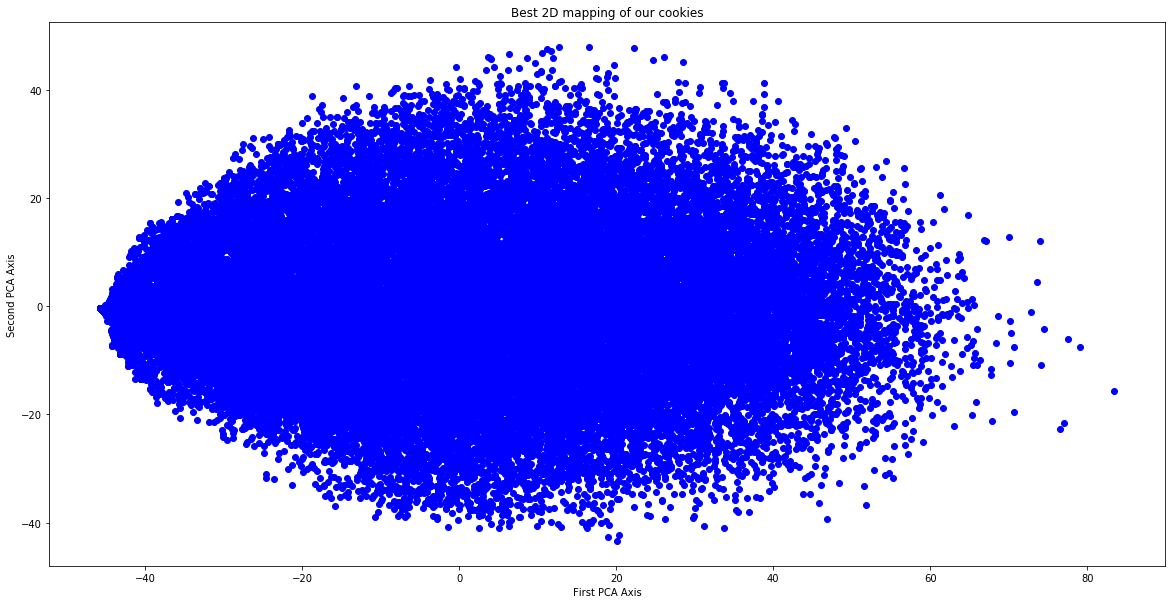

In [119]:
fig,ax=plt.subplots(figsize=(20, 10))
ax.scatter(pca_representation[:,0],pca_representation[:,1],c='blue')
ax.set_xlabel('First PCA Axis')
ax.set_ylabel('Second PCA Axis')
ax.set_title('Best 2D mapping of our cookies')
plt.show()

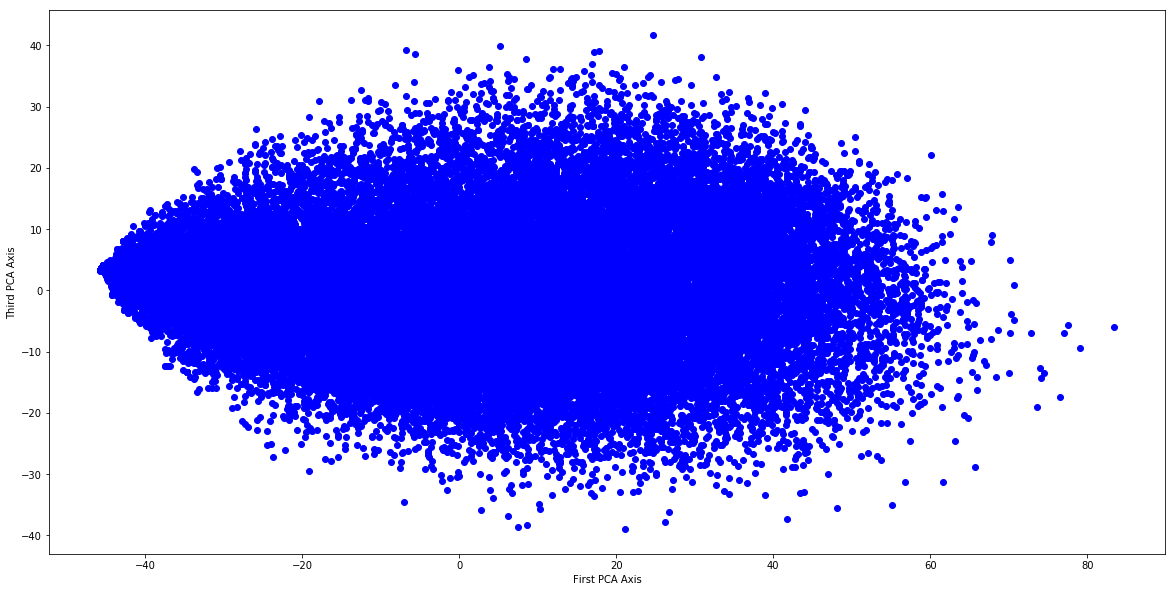

In [120]:
fig,ax=plt.subplots(figsize=(20, 10))
ax.scatter(pca_representation[:,0],pca_representation[:,2],c='blue')
ax.set_xlabel('First PCA Axis')
ax.set_ylabel('Third PCA Axis')
plt.show()

In [121]:
class HierarchicalClustering:
    
    #Instantiate the object and computes the distance matrix between the points 
    def __init__(self,dataset,method_param='ward',metric_param='euclidean'):

        #faster implementation than scipy 
        from fastcluster import  linkage_vector
        from scipy.spatial.distance import pdist

        self.Z = linkage_vector(dataset,method=method_param,metric=metric_param)

    #plot the dendrogram of the hierarchical clustering
    def dendrogram(self,max_group=10):
        from scipy.cluster.hierarchy import dendrogram
        import matplotlib.pyplot as plt
        fig,ax=plt.subplots(figsize=(10,20))
        ax.set_title("Dendrogram")
        dendrogram(self.Z,orientation='top',truncate_mode='lastp', p=max_group,show_contracted=True)
        plt.show()


    #  Outputs the group of each point k: cluster_numbers
    def groups(self,k):
        from scipy.cluster.hierarchy import fcluster
        #cluster hierarchy by using loadings of ACP
        groupes_cah = fcluster(self.Z,k,criterion='maxclust')
        return groupes_cah

In [122]:
hc=HierarchicalClustering(pca_representation)

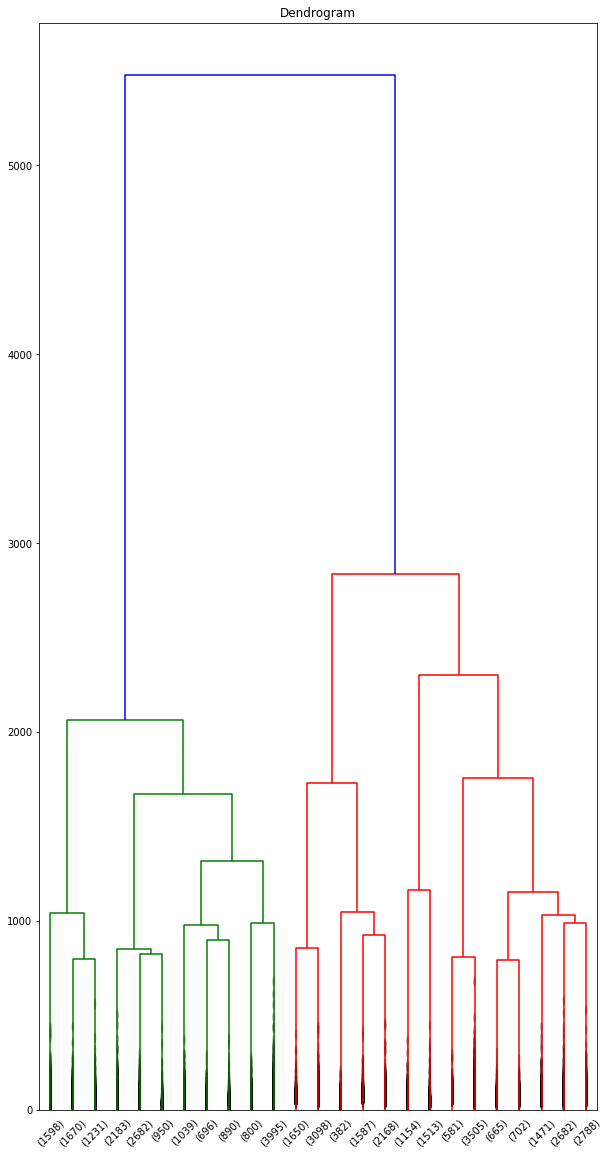

In [123]:
hc.dendrogram(max_group=25)

In [125]:
clusters_predicted_5=hc.groups(5)

In [126]:
def group_proportions(groupes_cah):
    L=[]
    p=[]
    clus=[]
    for i in np.unique(groupes_cah):
        L.append(list(groupes_cah).count(i))
        p.append(float(L[i-1])/len(groupes_cah))
        clus.append(i)
    ddd=pd.DataFrame({'cluster':clus,'count':L,'ratio':p})
    ddd=ddd.set_index('cluster')
    return ddd

In [127]:
group_proportions(clusters_predicted_5)

,count,ratio
cluster,,
1,4499,0.107941
2,13235,0.317538
3,8885,0.213172
4,2667,0.063988
5,12394,0.297361


In [128]:
def show2d(data,clusters,a=0,b=1):
    import matplotlib.patches as mpatches
    colors={}
    colors_list=["#40b8ef","#fcac00","#FF4A46","#008941","#FFDBE5","#A30059","#006FA6","#0000A6","#7A4900","#63FFAC","#B79762","#004D43","#8FB0FF","#997D87","#5A0007","#809693","#FEFFE6","#1B4400"]
    for i in range(len(colors_list)):
        colors[i+1]=colors_list[i]
        
    plt.figure(figsize=(20, 15))
    dfCloud=pd.DataFrame(dict(x=data[:,a], y=data[:,b], cluster=clusters))
    plt.scatter(dfCloud['x'],dfCloud['y'],marker='o',linewidths=0,s=20, c=dfCloud['cluster'].apply(lambda x: colors[x])) 

    n_cluster=int(dfCloud.cluster.unique().shape[0])
    class_colours=list(colors.values())[:n_cluster]
    classes=list(range(1,n_cluster+1))
    recs=[]
    for i in range(0,len(class_colours)):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))

    plt.legend(recs,classes,loc='best')

    plt.show()

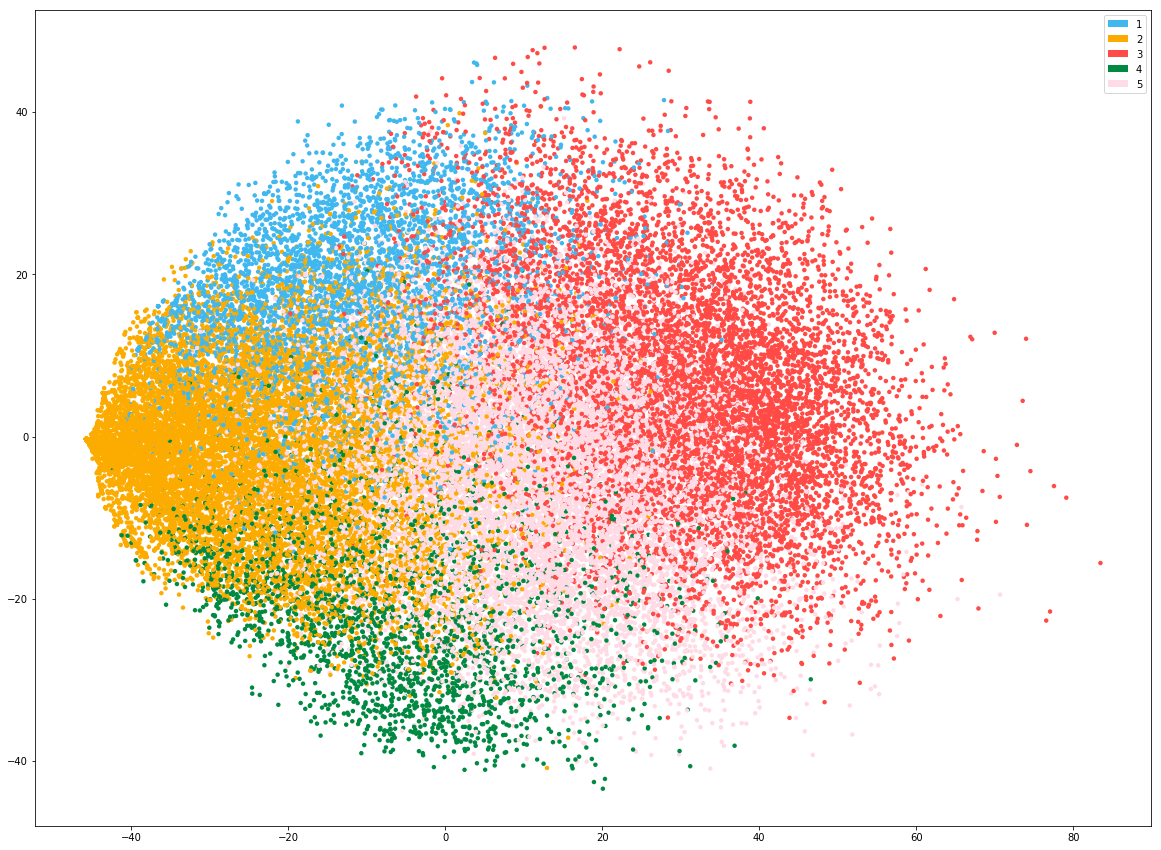

In [129]:
show2d(pca_representation,clusters_predicted_5,a=0,b=1)

In [130]:
def clustDesc(original_dataframe,clusters_predicted,i):

    t1=original_dataframe[clusters_predicted==i].mean()
    t2=original_dataframe.mean()

    t4=t1/t2

    d= pd.DataFrame({'AVGCluster':t1,'AVG':t2, 'Uplift':t4}).sort_values(by='Uplift',ascending=False)
    
    #rearrangement
    cols=['AVGCluster','AVG','Uplift']
    d=d[cols]
    d.drop(d[(d.AVGCluster < 2.5) | (d.Uplift < 1)].index, inplace = True)

    return d

In [131]:
class ExcelWriter:
    def __init__(self,original_dataframe,clusters_predicted,filename):
        self.original_dataframe=original_dataframe
        self.clusters_predicted=clusters_predicted
        self.writer=pd.ExcelWriter(filename, engine='xlsxwriter')

    def create_file(self,verbose=True):
        if verbose:
            print("Creating excel file ...")

        n_cluster=np.unique(self.clusters_predicted).shape[0]

        group_proportions(self.clusters_predicted).to_excel(self.writer, sheet_name='Repartition')

        workbook  = self.writer.book
        worksheet = self.writer.sheets['Repartition']
        chart = workbook.add_chart({'type': 'doughnut'})
        chart.add_series({'values': '=Repartition!$C$2:$C$'+str(n_cluster+1),'data_labels': {'percentage': True}})
        worksheet.insert_chart('G2', chart)

        for i in range(1,n_cluster+1):
            label='C'+str(i)
            clustDesc(self.original_dataframe,self.clusters_predicted,i).to_excel(self.writer, sheet_name=label)

        self.writer.close()

        if verbose:
            print("Done")

        return

In [132]:
# Create an Excel file summarizing the segmentation with 5 clusters

#Name of the file you want to create
filepath='clusters_5.xlsx'

#Create the ExcelWriter object
xls_writer=ExcelWriter(df,clusters_predicted_5,filepath)

#Create the file
xls_writer.create_file()

Creating excel file ...
Done


In [145]:
cluster_list = clusters_predicted_5.tolist()
se = pd.Series(cluster_list) #это костыль =)

In [146]:
df_geo["cluster_id"] =  se.values
df_geo.to_csv("all_info+clusters.csv")

In [7]:
df_geo = pd.read_csv("all_info+clusters.csv")

In [10]:
df_geo.loc['Cluster_1_mean'] = df_geo[df_geo.cluster_id == 1].mean()
df_geo.loc['Cluster_2_mean'] = df_geo[df_geo.cluster_id == 2].mean()
df_geo.loc['Cluster_3_mean'] = df_geo[df_geo.cluster_id == 3].mean()
df_geo.loc['Cluster_4_mean'] = df_geo[df_geo.cluster_id == 4].mean()
df_geo.loc['Cluster_5_mean'] = df_geo[df_geo.cluster_id == 5].mean()

In [11]:
df_geo.drop(["Unnamed: 0", "owner", "country", "profile_date"],  axis=1, inplace = True)

In [12]:
df_geo.tail()

,afficheW,latitude,longitude,c_gt_Cycling,c_gt_Auto_B_Compact_Crossover,c_gt_Sports_equipments_and_Outdoor_gear,c_gt_ISP_and_Browsers,c_gt_Fragrance,c_gt_Films,c_gt_Transition_Fuel,c_gt_Tradesman,c_gt_Comedy,c_gt_Auto_Brand_B,c_gt_Auto_Brand_C,c_gt_Auto_Brand_A,c_gt_South_American_Travel,c_gt_Alps_3_Valleys,c_gt_Diet_and_nutrition,c_gt_Holidays,c_gt_Beauty_products,c_gt_Computer_Science,c_gt_News,c_gt_History,c_gt_Tourism,c_gt_Air_Transport,c_gt_Furniture,c_gt_Amusement_park,c_gt_Hair_products_and_styling,c_gt_Back_to_school,c_gt_Golf,c_gt_Fantasy,c_gt_Supermarkets,c_gt_Auto_Off_road,c_gt_Higher_education,c_gt_Architect,c_gt_Holiday_rentals,c_gt_DIY_Equipment,c_gt_X,c_gt_Fauna,c_gt_Swimming,c_gt_Ecology,c_gt_Art,c_gt_Good_deals,c_gt_Loans,c_gt_Laptop,c_gt_Utility_vehicles,c_gt_Accessories,c_gt_Computer_hardware_and_devices,c_gt_Desserts,c_gt_Health,c_gt_Auto_Multi_Purpose_Vehicles,c_gt_Churn_Telecom,c_gt_Professional_insurance,c_gt_Jewelry,c_gt_Alzheimer_Aid,c_gt_Retirement_period,c_gt_Auto_F_Sport_and_luxury_cars,c_gt_Cameras,c_gt_Arts_and_crafts,c_gt_Eyewear,c_gt_Sports,c_gt_Weapons,c_gt_Relaxation_therapy,c_gt_Auto_C_Compact_cars,c_gt_Social_networks,c_gt_Gambling,c_gt_Teaching,c_gt_High_Fashion,c_gt_Winter_Holidays,c_gt_Local_car_brands,c_gt_Car_buyers,c_gt_Theatre,c_gt_Entrepreneur,c_gt_Insurance_churning,c_gt_Motor_Sport,c_gt_Auto_parts,c_gt_Event_Planning,c_gt_Going_out,c_gt_Popular_Events,c_gt_Bicycle,c_gt_Astronomy,c_gt_Cooking,c_gt_Air_conditioning,c_gt_Occult,c_gt_Company_Buyout,c_gt_Video_games,c_gt_Careers_and_occupational_training,c_gt_Comics,c_gt_Geothermic_Eolic_and_Biomasses,c_gt_Health_and_Care_Products,c_gt_Car_Rental,c_gt_Rail_Transport,c_gt_Lingerie,c_gt_Business_Administration_and_Management,c_gt_Solar_Energy,...,c_gt_Cosmetic_surgery,c_gt_Laundry,c_gt_custom_cluster_3,c_gt_Insurance,c_gt_Fast_Food_Brand_A,c_gt_Infants_and_children,c_gt_Anatomy,c_gt_Running,c_gt_Games_consoles,c_gt_Energy_Savings,c_gt_Sunny_Destination,c_gt_Philosophy,c_gt_Internet_of_Things,c_gt_Cinemas,c_gt_Champions_League,c_gt_Asset_management,c_gt_Reality_Television,c_gt_Fine_dining_and_local_produce,c_gt_Rugby,c_gt_Kitchen_Appliances,c_gt_Top_French_Engineering_schools,c_gt_Cloud_computing,c_gt_Horse_racing,c_gt_Heritage_transmission,c_gt_Meat_and_Fish,c_gt_Auto_E_Minivan,c_gt_Travel_in_France,c_gt_ALevels,c_gt_Advertising,c_gt_Auto_A_Urban_cars,c_gt_Literature,c_gt_Hiking_and_Mountaineering,c_gt_Tapeo,c_gt_Stop_smoking,c_gt_Gas_and_electricity,c_gt_Pets,c_gt_Outdoor_activities,c_gt_Snacks,c_gt_Warez,c_gt_Veg_and_Vegan,c_gt_Major_Appliances_White_goods,c_gt_Weather,c_gt_Personal_care,c_gt_Vegetarian_and_Environmentally_friendly,c_gt_Politics,c_gt_Clothing,c_gt_Tablet,c_gt_Astrology,c_gt_Business_Travel,c_gt_Auto_Brand_D,c_gt_Auto_Brand_E,c_gt_Auto_Brand_F,c_gt_Auto_Brand_G,c_gt_Auto_Brand_H,c_gt_Auto_Brand_I,c_gt_Auto_Brand_J,c_gt_Auto_Brand_K,c_gt_Auto_Brand_L,c_gt_Auto_Brand_M,c_gt_Auto_Brand_N,c_gt_Auto_Brand_O,s_a_11_14,s_a_15_17,s_a_18_24,s_a_25_34,s_a_35_49,s_a_50_64,s_a_65_110,s_g_m,s_g_f,s_s_i,s_u_pdt,s_u_plh,s_u_pwe,s_u_pnw,s_u_hp,s_u_hpt,s_u_hnt,s_u_hat,s_i_0,s_i_1,s_i_2,s_i_3,s_i_4,s_c_w,s_c_wo,s_f_c,s_f_f,s_f_sp,s_f_s,s_e_po,s_e_pr,s_e_s,s_e_u,cluster_id
Cluster_1_mean,NaN,54.572464,53.327421,11.800000,NaN,9.456660,7.763063,8.263006,6.229494,18.00,10.315068,8.848485,NaN,NaN,NaN,9.545455,NaN,8.141176,8.310229,7.319489,8.328682,8.745490,6.452441,7.423044,10.129032,7.959918,6.820513,9.615385,6.892032,9.650000,7.158672,7.674479,7.666667,6.160906,8.915083,8.707207,9.000000,NaN,9.213889,7.640979,9.055556,7.670313,11.200513,14.457673,6.731801,14.747415,8.365854,8.311082,7.614737,5.747619,13.833333,8.941935,NaN,10.181364,5.431120,8.759615,NaN,10.438202,6.562500,7.018913,6.327413,NaN,7.049470,NaN,8.272980,11.137255,6.596891,10.695652,11.121547,12.675743,16.994724,6.412766,11.341224,8.365199,12.112521,14.613977,9.634146,7.076285,NaN,NaN,11.094417,8.194346,11.843049,NaN,NaN,8.256410,7.784864,8.652493,NaN,NaN,12.457810,10.890625,NaN

In [17]:
df_geo.tail(10)

,afficheW,latitude,longitude,c_gt_Cycling,c_gt_Auto_B_Compact_Crossover,c_gt_Sports_equipments_and_Outdoor_gear,c_gt_ISP_and_Browsers,c_gt_Fragrance,c_gt_Films,c_gt_Transition_Fuel,c_gt_Tradesman,c_gt_Comedy,c_gt_Auto_Brand_B,c_gt_Auto_Brand_C,c_gt_Auto_Brand_A,c_gt_South_American_Travel,c_gt_Alps_3_Valleys,c_gt_Diet_and_nutrition,c_gt_Holidays,c_gt_Beauty_products,c_gt_Computer_Science,c_gt_News,c_gt_History,c_gt_Tourism,c_gt_Air_Transport,c_gt_Furniture,c_gt_Amusement_park,c_gt_Hair_products_and_styling,c_gt_Back_to_school,c_gt_Golf,c_gt_Fantasy,c_gt_Supermarkets,c_gt_Auto_Off_road,c_gt_Higher_education,c_gt_Architect,c_gt_Holiday_rentals,c_gt_DIY_Equipment,c_gt_X,c_gt_Fauna,c_gt_Swimming,c_gt_Ecology,c_gt_Art,c_gt_Good_deals,c_gt_Loans,c_gt_Laptop,c_gt_Utility_vehicles,c_gt_Accessories,c_gt_Computer_hardware_and_devices,c_gt_Desserts,c_gt_Health,c_gt_Auto_Multi_Purpose_Vehicles,c_gt_Churn_Telecom,c_gt_Professional_insurance,c_gt_Jewelry,c_gt_Alzheimer_Aid,c_gt_Retirement_period,c_gt_Auto_F_Sport_and_luxury_cars,c_gt_Cameras,c_gt_Arts_and_crafts,c_gt_Eyewear,c_gt_Sports,c_gt_Weapons,c_gt_Relaxation_therapy,c_gt_Auto_C_Compact_cars,c_gt_Social_networks,c_gt_Gambling,c_gt_Teaching,c_gt_High_Fashion,c_gt_Winter_Holidays,c_gt_Local_car_brands,c_gt_Car_buyers,c_gt_Theatre,c_gt_Entrepreneur,c_gt_Insurance_churning,c_gt_Motor_Sport,c_gt_Auto_parts,c_gt_Event_Planning,c_gt_Going_out,c_gt_Popular_Events,c_gt_Bicycle,c_gt_Astronomy,c_gt_Cooking,c_gt_Air_conditioning,c_gt_Occult,c_gt_Company_Buyout,c_gt_Video_games,c_gt_Careers_and_occupational_training,c_gt_Comics,c_gt_Geothermic_Eolic_and_Biomasses,c_gt_Health_and_Care_Products,c_gt_Car_Rental,c_gt_Rail_Transport,c_gt_Lingerie,c_gt_Business_Administration_and_Management,c_gt_Solar_Energy,...,c_gt_Cosmetic_surgery,c_gt_Laundry,c_gt_custom_cluster_3,c_gt_Insurance,c_gt_Fast_Food_Brand_A,c_gt_Infants_and_children,c_gt_Anatomy,c_gt_Running,c_gt_Games_consoles,c_gt_Energy_Savings,c_gt_Sunny_Destination,c_gt_Philosophy,c_gt_Internet_of_Things,c_gt_Cinemas,c_gt_Champions_League,c_gt_Asset_management,c_gt_Reality_Television,c_gt_Fine_dining_and_local_produce,c_gt_Rugby,c_gt_Kitchen_Appliances,c_gt_Top_French_Engineering_schools,c_gt_Cloud_computing,c_gt_Horse_racing,c_gt_Heritage_transmission,c_gt_Meat_and_Fish,c_gt_Auto_E_Minivan,c_gt_Travel_in_France,c_gt_ALevels,c_gt_Advertising,c_gt_Auto_A_Urban_cars,c_gt_Literature,c_gt_Hiking_and_Mountaineering,c_gt_Tapeo,c_gt_Stop_smoking,c_gt_Gas_and_electricity,c_gt_Pets,c_gt_Outdoor_activities,c_gt_Snacks,c_gt_Warez,c_gt_Veg_and_Vegan,c_gt_Major_Appliances_White_goods,c_gt_Weather,c_gt_Personal_care,c_gt_Vegetarian_and_Environmentally_friendly,c_gt_Politics,c_gt_Clothing,c_gt_Tablet,c_gt_Astrology,c_gt_Business_Travel,c_gt_Auto_Brand_D,c_gt_Auto_Brand_E,c_gt_Auto_Brand_F,c_gt_Auto_Brand_G,c_gt_Auto_Brand_H,c_gt_Auto_Brand_I,c_gt_Auto_Brand_J,c_gt_Auto_Brand_K,c_gt_Auto_Brand_L,c_gt_Auto_Brand_M,c_gt_Auto_Brand_N,c_gt_Auto_Brand_O,s_a_11_14,s_a_15_17,s_a_18_24,s_a_25_34,s_a_35_49,s_a_50_64,s_a_65_110,s_g_m,s_g_f,s_s_i,s_u_pdt,s_u_plh,s_u_pwe,s_u_pnw,s_u_hp,s_u_hpt,s_u_hnt,s_u_hat,s_i_0,s_i_1,s_i_2,s_i_3,s_i_4,s_c_w,s_c_wo,s_f_c,s_f_f,s_f_sp,s_f_s,s_e_po,s_e_pr,s_e_s,s_e_u,cluster_id
41675,zzffXI4f6pnP,58.050000,38.833300,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,17.000000,5.000000,NaN,11.000000,12.000000,5.000000,11.000000,NaN,16.000000,NaN,NaN,12.000000,NaN,NaN,16.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.000000,11.000000,NaN,16.000000,NaN,NaN,NaN,9.000000,NaN,5.000000,NaN,5.000000,2.000000,10.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,9.000000,NaN,9.000000,NaN,NaN,NaN,19.000000,16.000000,17.000000,4.000000,18.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,14.000000,NaN,NaN,16.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,7.000000,NaN,6.000000,NaN,14.000000,NaN,NaN,NaN,3.000000,NaN,7.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,16.000000,N

In [18]:
df_geo.dropna(axis=1, how='all', inplace=True)

In [21]:
df_geo.to_csv("NEW_all_info+clusters.csv", sep = ",")